# 6.8 Preprocessing Data for Tableau Dashboard: Type & Category

### This script contains the following:
#### 1. Import data and libraries
#### 2. Data Cleaning
    Zip code
    Type
    Category
#### 3. Geo Shape - Centroid
#### 4. Year opened
#### 5. Year renovated

### 1. Import data and libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import folium
import json
from shapely.geometry import shape, Point

In [2]:
# This command propts matplotlib visuals to appear in the notebook 

%matplotlib inline

In [3]:
path = r'/Users/kristincpeterson/Desktop/DataAnalytics/Achievement_6/Final Project - Espaces Verts'

In [4]:
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared_Data', 'espaces_verts_75_updated.csv'))

In [5]:
df.shape

(2286, 25)

In [6]:
df.head()

,Unnamed: 0.1,Unnamed: 0,ID,Name,Type,Category,Street Number,Street Number Suffix,Street Type,Street Name,...,Perimeter,Year opened,Year renovated,Former name,Year name changed,Number of entities,Open 24hrs,Geo Shape,URL_PLAN,Area category
0,0,0,11255.0,JARDINIERES DU 39 QUAI DE LA SEINE,Décorations sur la voie publique,Jardiniere,39.0,NaN,QUAI DE LA,SEINE,...,30.737389,2011.0,NaN,NaN,NaN,2.0,NaN,"{""coordinates"": [[[[2.3733184661747395, 48.886...",http://p70-planet.apps.paris.mdp/Advitium/Appe...,Small size
1,1,1,10804.0,JARDINIERES DU PARVIS DE LA PLACE RAOUL DAUTRY,Décorations sur la voie publique,Jardiniere,6.0,S,PLACE,RAOUL DAUTRY,...,312.718568,NaN,NaN,NaN,NaN,4.0,NaN,"{""coordinates"": [[[[2.3216385869638, 48.841417...",http://p70-planet.apps.paris.mdp/Advitium/Appe...,Large size
2,2,2,10937.0,JARDINIERES ANGLE DES RUES DE TOLBIAC - BAUDRI...,Décorations sur la voie publique,Jardiniere,47.0,NaN,RUE,BAUDRICOURT,...,80.353023,2005.0,NaN,NaN,NaN,2.0,NaN,"{""coordinates"": [[[[2.363882470474931, 48.8265...",http://p70-planet.apps.paris.mdp/Advitium/Appe...,Small size
3,3,3,219.0,JARDIN FRANCOISE GIROUD,Promenades ouvertes,Jardin,4.0,V,PLACE D,ITALIE,...,245.468867,1878.0,2019.0,SQUARE DE LA PLACE D'ITALIE,2013.0,1.0,Oui,"{""coordinates"": [[[2.356129760906164, 48.83152...",http://p70-planet.apps.paris.mdp/Advitium/Appe...,Very large size
4,4,4,10303.0,JARDINIERE DE LA PLACE FRANZ LISZT,Décorations sur la voie publique,Jardiniere,2.0,BIS V,PLACE,FRANZ LISTZ,...,52.677758,NaN,NaN,NaN,NaN,1.0,NaN,"{""coordinates"": [[[2.351449405515269, 48.87773...",http://p70-planet.apps.paris.mdp/Advitium/Appe...,Small size


### 2. Data Cleaning

In [7]:
# Removing unneeded columns

df.drop(columns=['Unnamed: 0',
                 'Unnamed: 0.1',
                 'Street Number', 
                 'Street Number Suffix', 
                 'Street Type', 
                 'Street Name', 
                 'Enclosure', 
                 'Former name', 
                 'Perimeter', 
                 'Year name changed',
                 'Number of entities',
                 'Open 24hrs', 
                 'URL_PLAN', 
                ], inplace=True)

In [8]:
df.head()

,ID,Name,Type,Category,Zip code,Calculated area,Actual total area,Horticultural area,Year opened,Year renovated,Geo Shape,Area category
0,11255.0,JARDINIERES DU 39 QUAI DE LA SEINE,Décorations sur la voie publique,Jardiniere,75019.0,19.0,20.0,20.0,2011.0,NaN,"{""coordinates"": [[[[2.3733184661747395, 48.886...",Small size
1,10804.0,JARDINIERES DU PARVIS DE LA PLACE RAOUL DAUTRY,Décorations sur la voie publique,Jardiniere,75015.0,1312.0,1100.0,1100.0,NaN,NaN,"{""coordinates"": [[[[2.3216385869638, 48.841417...",Large size
2,10937.0,JARDINIERES ANGLE DES RUES DE TOLBIAC - BAUDRI...,Décorations sur la voie publique,Jardiniere,75013.0,58.0,56.0,56.0,2005.0,NaN,"{""coordinates"": [[[[2.363882470474931, 48.8265...",Small size
3,219.0,JARDIN FRANCOISE GIROUD,Promenades ouvertes,Jardin,75013.0,5386.0,5400.0,2796.0,1878.0,2019.0,"{""coordinates"": [[[2.356129760906164, 48.83152...",Very large size
4,10303.0,JARDINIERE DE LA PLACE FRANZ LISZT,Décorations sur la voie publique,Jardiniere,75010.0,172.0,85.0,85.0,NaN,NaN,"{""coordinates"": [[[2.351449405515269, 48.87773...",Small size


In [9]:
# Check missing values 
missing_values = df.isnull().sum()

# Calculate the percentage of missing values for each column
missing_percentage = (missing_values / len(df)) * 100

# Display the percentage of missing values for each column
missing_percentage.sort_values(ascending=False)

Year renovated        95.756780
Year opened           31.758530
Horticultural area    25.940507
Actual total area     23.972003
Area category         23.972003
Calculated area       13.604549
ID                     2.755906
Geo Shape              0.087489
Type                   0.043745
Name                   0.000000
Category               0.000000
Zip code               0.000000
dtype: float64

In [10]:
df.dtypes

ID                    float64
Name                   object
Type                   object
Category               object
Zip code              float64
Calculated area       float64
Actual total area     float64
Horticultural area    float64
Year opened           float64
Year renovated        float64
Geo Shape              object
Area category          object
dtype: object

#### Zip code

In [11]:
# Convert Zip code to string, remove the last character

df['Zip code'] = df['Zip code'].astype(str).str[:-2]

In [12]:
print(df['Zip code'].head())

0    75019
1    75015
2    75013
3    75013
4    75010
Name: Zip code, dtype: object


#### Type

In [13]:
# View unique values in Type column

unique_values = df['Type'].unique()

In [14]:
print(unique_values)

['Décorations sur la voie publique' 'Promenades ouvertes'
 'Murs végétalisés' 'Jardins privatifs' 'Etablissements sportifs'
 'Jardinets décoratifs' 'Ephémères, partagés, pédagogiques' 'Périphérique'
 'Cimetières' nan 'Bois']


In [15]:
print(df['Type'].isnull().sum())

1


In [16]:
# Renaming unique values in Type column

df['Type'] = df['Type'].replace({
    'Décorations sur la voie publique': 'Decorations on public roads',
    'Promenades ouvertes': 'Open walks: parks, gardens, squares',
    'Murs végétalisés': 'Green walls',
    'Jardins privatifs': 'Gardens',
    'Etablissements sportifs': 'Sports establishments',
    'Jardinets décoratifs': 'Gardens',
    'Ephémères, partagés, pédagogiques': 'Gardens',
    'Périphérique': 'Ring road',
    'Cimetières': 'Cemeteries',
    'Bois': 'Woods'
})

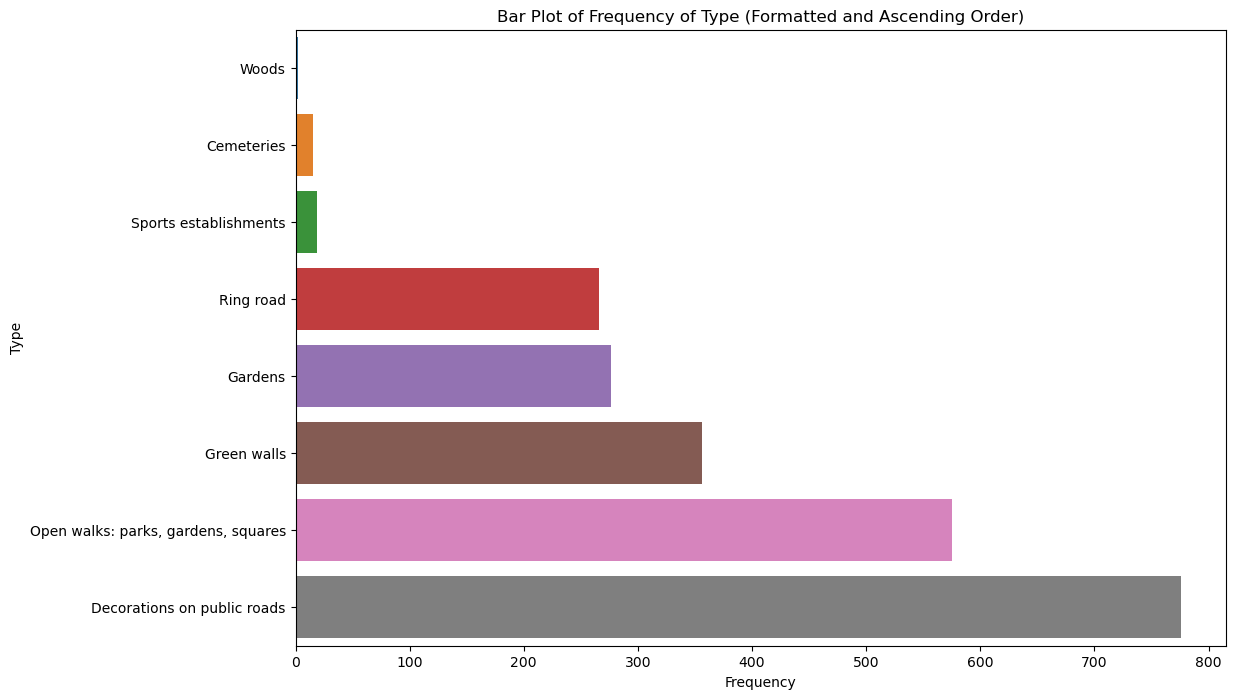

In [17]:
# Creating a bar plot for the frequency of 'Type' with formatted names and arranged in ascending order

formatted_cat_freq = df['Type'].value_counts().sort_values()
plt.figure(figsize=(12, 8))
sns.barplot(x=formatted_cat_freq.values, y=formatted_cat_freq.index)

plt.title("Bar Plot of Frequency of Type (Formatted and Ascending Order)")
plt.xlabel('Frequency')
plt.ylabel('Type')
plt.show()


#### Category

In [18]:
# View unique values in Category column

unique_values_c = df['Category'].unique()

In [19]:
print(unique_values_c)

['Jardiniere' 'Jardin' 'Murs vegetalises' 'Decoration' 'Talus'
 'Espace Vert' 'Promenade' 'Jardin partage' 'Plate-bande' 'Square'
 'Jardinet' 'Cimetière' 'Pelouse' 'Esplanade' "Jardin d'immeubles"
 'Terrain de boules' 'Terre-plein' 'Mail' 'Parc' 'Arboretum' 'Bois' 'CA'
 'Archipel' 'Ile']


In [20]:
# Renaming unique values in Category column

df['Category'] = df['Category'].replace({
    'Jardiniere': 'Planter',
    'Jardin': 'Garden',
    'Murs vegetalises': 'Green wall',
    'Decoration': 'Decoration',
    'Talus': 'Embankment',
    'Espace Vert': 'Green space',
    'Promenade': 'Promenade or Esplanade',
    'Jardin partage': 'Garden',
    'Plate-bande': 'Flowerbed',
    'Jardinet': 'Garden',
    'Cimetière': 'Cemetery',
    'Pelouse': 'Lawn or Mall',
    'Esplanade': 'Promenade or Esplanade',
    'Jardin d\'immeubles': 'Garden',
    'Terrain de boules': 'Bocce court',
    'Terre-plein': 'Median',
    'Mail': 'Lawn or Mall',
    'Parc': 'Park',
    'Bois': 'Woods',
    'CA': 'Green space',
    'Archipel': 'Island',
    'Ile': 'Island'
})

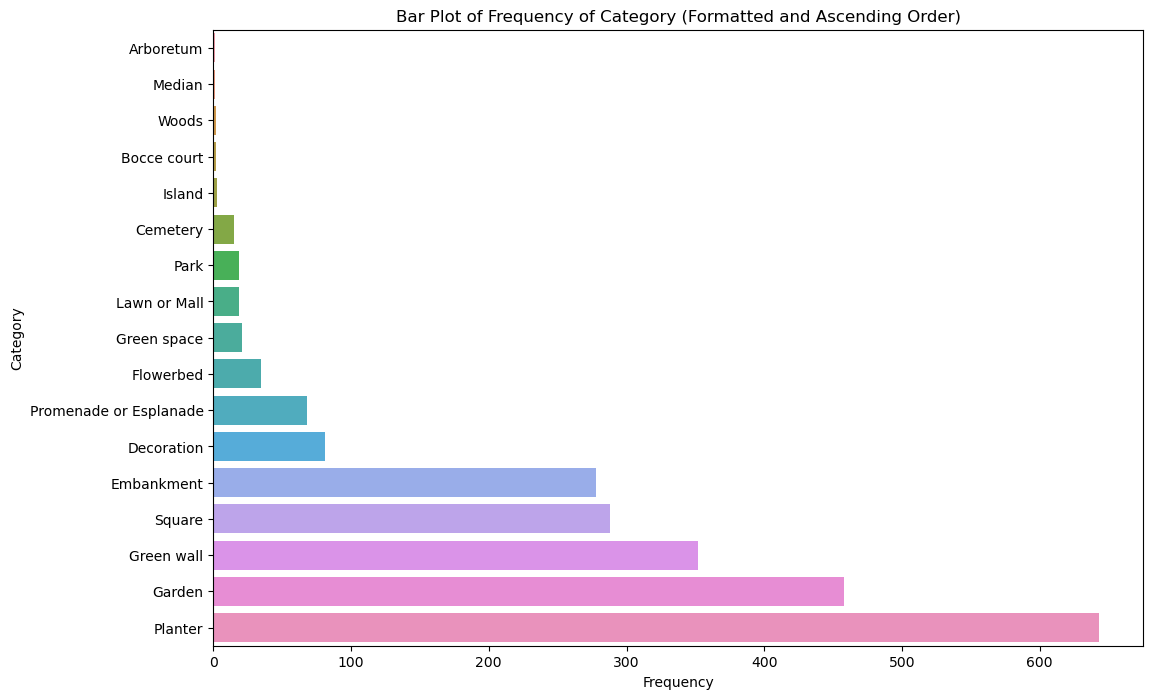

In [21]:
# Creating a bar plot for the frequency of 'Category' with formatted names and arranged in ascending order

formatted_cat_freq = df['Category'].value_counts().sort_values()
plt.figure(figsize=(12, 8))
sns.barplot(x=formatted_cat_freq.values, y=formatted_cat_freq.index)

plt.title("Bar Plot of Frequency of Category (Formatted and Ascending Order)")
plt.xlabel('Frequency')
plt.ylabel('Category')
plt.show()


### 3. Geo Shape - Centroid

#### Extract the centroid of each GeoJSON shape to represent each space with a single point on the map.

In [22]:
# Ensure 'Geo Shape' is a string and not missing

df = df.dropna(subset=['Geo Shape'])
df['Geo Shape'] = df['Geo Shape'].astype(str)

In [23]:
# Extract latitude and longitude values from the GeoJSON data in the 'Geo Shape' column

def extract_centroid(geojson_str):
    # Check if geojson_str is not None, not empty, and starts with '{' (basic check for valid JSON)
    if pd.notna(geojson_str) and isinstance(geojson_str, str) and geojson_str.strip().startswith('{'):
        try:
            # Load GeoJSON string into a Python dict
            geojson = json.loads(geojson_str)
            
            # Create a shape from the GeoJSON
            polygon = shape(geojson)
            
            # Return the centroid of the polygon
            return polygon.centroid.x, polygon.centroid.y
        except Exception as e:
            # Print error message and return None in case of any error
            print(f"Error processing GeoJSON: {e}")
            return None, None
    else:
        # Return None if the input is not a valid string
        return None, None


In [24]:
# Apply the function to each row in the DataFrame

df['Longitude'], df['Latitude'] = zip(*df['Geo Shape'].apply(extract_centroid))

In [25]:
df.head()

,ID,Name,Type,Category,Zip code,Calculated area,Actual total area,Horticultural area,Year opened,Year renovated,Geo Shape,Area category,Longitude,Latitude
0,11255.0,JARDINIERES DU 39 QUAI DE LA SEINE,Decorations on public roads,Planter,75019,19.0,20.0,20.0,2011.0,NaN,"{""coordinates"": [[[[2.3733184661747395, 48.886...",Small size,2.373282,48.886146
1,10804.0,JARDINIERES DU PARVIS DE LA PLACE RAOUL DAUTRY,Decorations on public roads,Planter,75015,1312.0,1100.0,1100.0,NaN,NaN,"{""coordinates"": [[[[2.3216385869638, 48.841417...",Large size,2.321028,48.841626
2,10937.0,JARDINIERES ANGLE DES RUES DE TOLBIAC - BAUDRI...,Decorations on public roads,Planter,75013,58.0,56.0,56.0,2005.0,NaN,"{""coordinates"": [[[[2.363882470474931, 48.8265...",Small size,2.363678,48.826484
3,219.0,JARDIN FRANCOISE GIROUD,"Open walks: parks, gardens, squares",Garden,75013,5386.0,5400.0,2796.0,1878.0,2019.0,"{""coordinates"": [[[2.356129760906164, 48.83152...",Very large size,2.355576,48.831435
4,10303.0,JARDINIERE DE LA PLACE FRANZ LISZT,Decorations on public roads,Planter,75010,172.0,85.0,85.0,NaN,NaN,"{""coordinates"": [[[2.351449405515269, 48.87773...",Small size,2.351592,48.877714


In [26]:
# Exporting updated 'Geo Shape' file

df.to_csv(os.path.join(path, '02 Data','Prepared_Data', 'espaces_verts_geo_updated.csv'))

### 4. Year opened

In [27]:
# Check missing values for Year opened

print(df['Year opened'].isnull().sum())

725


In [28]:
# Filter and print years over 2025
years_over_2025 = df[df['Year opened'] > 2025]['Year opened'].unique()

print("Years over 2025:", years_over_2025)

Years over 2025: [9999. 9998.]


In [29]:
# Convert 'Year' column to numeric if it's not already, handling non-numeric values as NaN

df['Year opened'] = pd.to_numeric(df['Year opened'], errors='coerce')

In [30]:
# Create a new DataFrame with only years 2024 and below

year_opened = df[df['Year opened'] <= 2024]

In [31]:
year_opened.shape

(1444, 14)

In [32]:
# Check missing values for Year renovated

print(year_opened['Year renovated'].isnull().sum())

1364


In [33]:
year_opened['Year opened'].describe()

count    1444.00000
mean     1990.50277
std        42.46085
min      1688.00000
25%      1982.00000
50%      2008.00000
75%      2016.00000
max      2023.00000
Name: Year opened, dtype: float64

In [34]:
print(year_opened['Year opened'].isnull().sum())

0


<Axes: xlabel='Year opened', ylabel='Count'>

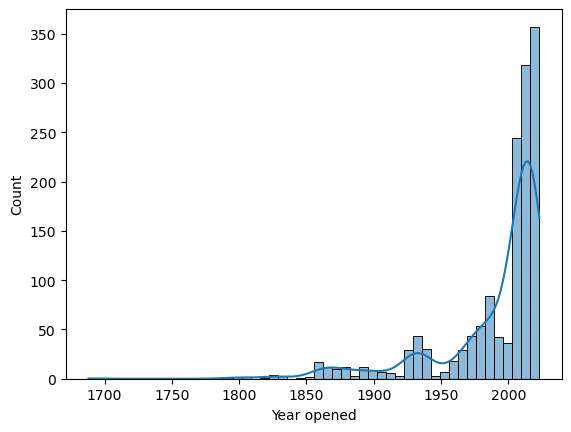

In [35]:
sns.histplot(year_opened['Year opened'], bins = 50, kde = True)

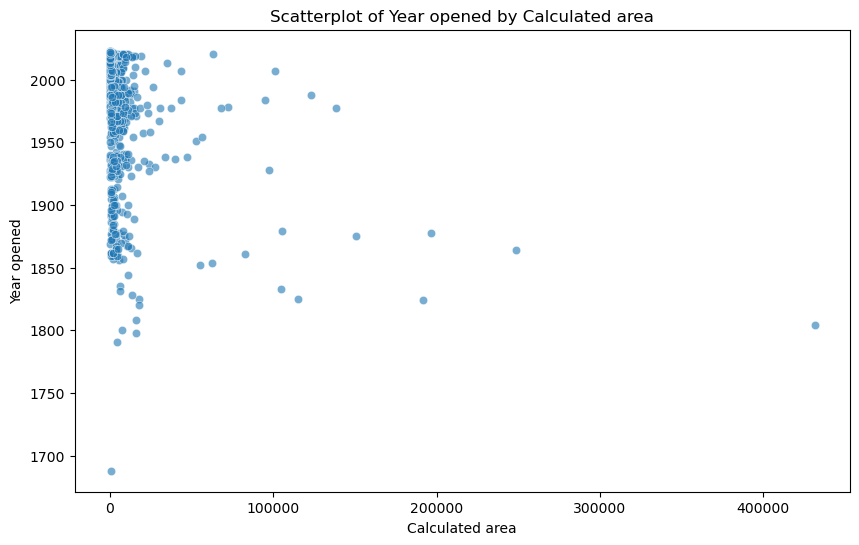

In [36]:
# Scatterplot to visualize 'Year opened' by 'Calculated area'

plt.figure(figsize=(10, 6))
sns.scatterplot(data=year_opened, x='Calculated area', y='Year opened', alpha=0.6)

plt.title('Scatterplot of Year opened by Calculated area')
plt.xlabel('Calculated area')
plt.ylabel('Year opened')
plt.show()


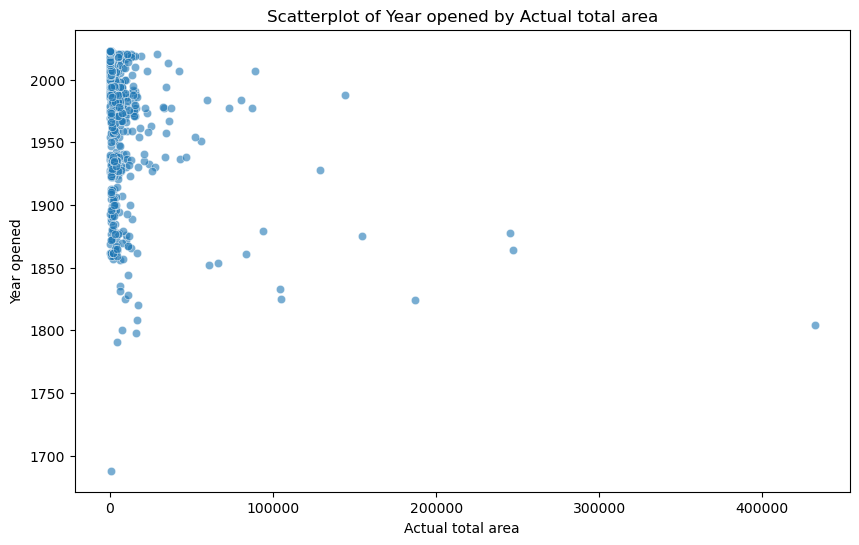

In [37]:
# Scatterplot to visualize 'Year opened' by 'Actual total area'

plt.figure(figsize=(10, 6))
sns.scatterplot(data=year_opened, x='Actual total area', y='Year opened', alpha=0.6)

plt.title('Scatterplot of Year opened by Actual total area')
plt.xlabel('Actual total area')
plt.ylabel('Year opened')
plt.show()


In [38]:
# Exporting 'Year opened' dataframe

year_opened.to_csv(os.path.join(path, '02 Data','Prepared_Data', 'year_opened.csv'))

### 5. Year renovated

In [39]:
# Check missing values for Year renovated

print(df['Year renovated'].isnull().sum())

2187


In [40]:
df['Year renovated'].describe()

count      97.000000
mean     2003.670103
std        25.362259
min      1801.000000
25%      2001.000000
50%      2010.000000
75%      2018.000000
max      2023.000000
Name: Year renovated, dtype: float64

In [41]:
year_renovated = df[df['Year renovated'] <= 2024]

In [42]:
print(year_renovated['Year renovated'].isnull().sum())

0


In [43]:
year_renovated.shape

(97, 14)

<Axes: xlabel='Year renovated', ylabel='Count'>

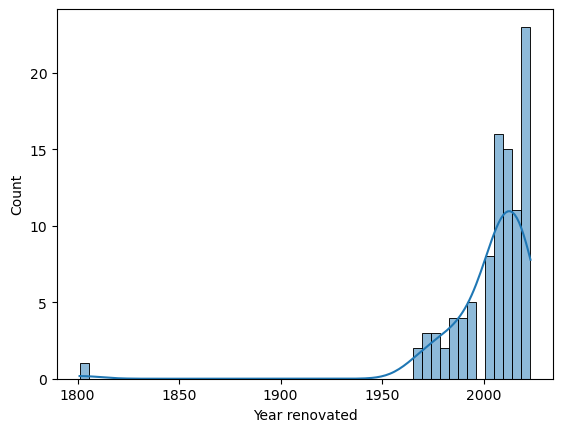

In [44]:
sns.histplot(year_renovated['Year renovated'], bins = 50, kde = True)

In [45]:
# Exporting 'Year renovated' dataframe

year_renovated.to_csv(os.path.join(path, '02 Data','Prepared_Data', 'year_renovated.csv'))